<a href="https://colab.research.google.com/github/kilee722/NFL_Data_Analytics/blob/main/nfl_big_data_bowl_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
games = pd.read_parquet('https://github.com/kilee722/NFL_Data_Analytics/raw/main/data/games.parquet.gzip')

games

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


In [ ]:
games.describe()

,gameId,week
count,2.530000e+02,253.000000
mean,2.018108e+09,9.122530
std,1.144901e+04,4.979801
min,2.018091e+09,1.000000
25%,2.018101e+09,5.000000
50%,2.018110e+09,9.000000
75%,2.018121e+09,14.000000
max,2.018123e+09,17.000000


In [ ]:
players = pd.read_parquet('https://github.com/kilee722/NFL_Data_Analytics/raw/main/data/players.parquet.gzip')

players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [ ]:
plays = pd.read_parquet('https://github.com/kilee722/NFL_Data_Analytics/raw/main/data/plays.parquet.gzip')

plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,None,None,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,None,None,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,None,None,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,None,None,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,None,None,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,NaN,"2 DL, 4 LB, 5 DB",None,NaN,NaN,None,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"2 DL, 4 LB, 5 DB",None,NaN,NaN,None,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"1 DL, 5 LB, 5 DB",None,NaN,NaN,None,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,NaN,"2 DL, 3 LB, 6 DB",None,NaN,NaN,None,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [ ]:
df_list = []
for week in range(1, 18):
  df = pd.read_parquet(f'https://github.com/kilee722/NFL_Data_Analytics/raw/main/data/week_{week}.parquet.gzip')
  df['Week'] = week
  df_list.append(df)

print(len(df_list))

17


In [ ]:
weekly_data = pd.concat(df_list)

weekly_data

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,Week
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,None,1
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,None,1
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,1
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,None,1
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049260,2018-12-31T04:23:24.200Z,95.77,11.20,7.15,1.75,0.73,103.97,118.54,None,2558942.0,Anthony Firkser,86.0,TE,102,home,2018123011,4261,left,POST,17
1049261,2018-12-31T04:23:24.200Z,101.94,14.60,5.63,2.24,0.57,139.23,119.97,None,2558976.0,Kenny Moore,23.0,CB,102,away,2018123011,4261,left,None,17
1049262,2018-12-31T04:23:24.200Z,102.68,0.94,2.34,1.67,0.24,164.79,152.29,None,2560789.0,Darius Leonard,53.0,LB,102,away,2018123011,4261,left,None,17
1049263,2018-12-31T04:23:24.200Z,105.82,0.71,2.28,3.53,0.25,284.72,93.44,None,2561521.0,Cameron Batson,17.0,WR,102,home,2018123011,4261,left,OUT,17


In [ ]:
weekly_data.isna().sum()

time                    0
x                       0
y                       0
s                       1
a                      28
dis                     1
o                 1247860
dir               1247846
event                   0
nflId             1247642
displayName             0
jerseyNumber      1247642
position          1247642
frameId                 0
team                    0
gameId                  0
playId                  0
playDirection           0
route            13191433
Week                    0
dtype: int64

In [ ]:
weekly_data.query('displayName == "Football"').shape

(1247642, 20)

In [ ]:
weekly_data[weekly_data.displayName == "Football"].shape

(1247642, 20)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [ ]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [ ]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18309388 entries, 0 to 1049264
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   x              float64
 2   y              float64
 3   s              float64
 4   a              float64
 5   dis            float64
 6   o              float64
 7   dir            float64
 8   event          object 
 9   nflId          float64
 10  displayName    object 
 11  jerseyNumber   float64
 12  position       object 
 13  frameId        int64  
 14  team           object 
 15  gameId         int64  
 16  playId         int64  
 17  playDirection  object 
 18  route          object 
 19  Week           int64  
dtypes: float64(9), int64(4), object(7)
memory usage: 2.9+ GB


# **Exploratory Data Analysis (EDA)**

### **Base EDA**

**Games** 

In [ ]:
games.head(3)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1


In [ ]:
games.tail(3)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16
252,2018122201,12/22/2018,20:20:00,LAC,BAL,16


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [ ]:
games.describe()

,gameId,week
count,2.530000e+02,253.000000
mean,2.018108e+09,9.122530
std,1.144901e+04,4.979801
min,2.018091e+09,1.000000
25%,2.018101e+09,5.000000
50%,2.018110e+09,9.000000
75%,2.018121e+09,14.000000
max,2.018123e+09,17.000000


In [ ]:
games.isnull().sum()

gameId             0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
week               0
dtype: int64

In [ ]:
# Countplot function
def cnt(xname, df):
    sns.countplot(x=xname, data = df)

# Catplot function
def cat(xname, df):
    sns.catplot(x=xname, data = df)

# Boxplot function
def bxp(xname, df):
    sns.boxplot(x=xname, data = df)

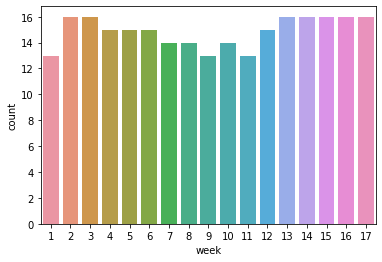

In [ ]:
cnt('week', games)

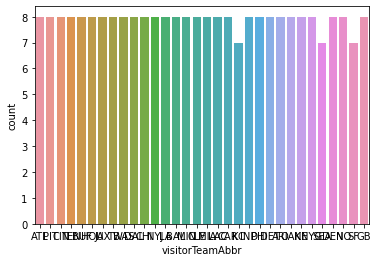

In [ ]:
cnt('visitorTeamAbbr', games)

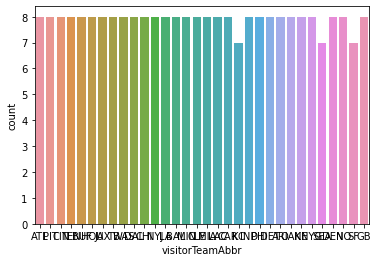

In [ ]:
cnt('visitorTeamAbbr', games)

In [ ]:
games.shape

(253, 6)

In [ ]:
games.gameDate.value_counts()


12/30/2018    16
12/02/2018    14
09/23/2018    14
12/09/2018    14
09/16/2018    14
10/07/2018    13
12/23/2018    13
10/14/2018    13
09/30/2018    13
11/11/2018    12
12/16/2018    12
10/21/2018    12
10/28/2018    12
11/04/2018    11
11/25/2018    11
11/18/2018    11
09/09/2018    10
11/22/2018     3
12/15/2018     2
09/10/2018     2
12/22/2018     2
09/27/2018     1
11/01/2018     1
11/05/2018     1
09/06/2018     1
10/22/2018     1
09/17/2018     1
10/29/2018     1
12/03/2018     1
11/15/2018     1
12/13/2018     1
12/17/2018     1
10/01/2018     1
10/08/2018     1
11/29/2018     1
09/20/2018     1
10/11/2018     1
09/13/2018     1
10/18/2018     1
10/15/2018     1
11/08/2018     1
11/12/2018     1
12/24/2018     1
09/24/2018     1
11/19/2018     1
12/06/2018     1
12/10/2018     1
11/26/2018     1
10/04/2018     1
10/25/2018     1
Name: gameDate, dtype: int64

**Players**

In [ ]:
players.head(3)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen


In [ ]:
players.tail(3)

,nflId,height,weight,birthDate,collegeName,position,displayName
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams
1302,2558095,6-2,196,10/12/1995,LSU,WR,Malachi Dupre


In [ ]:
players.shape

(1303, 7)

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [ ]:
players.describe()

,nflId,weight
count,1.303000e+03,1303.000000
mean,2.416518e+06,222.537222
std,5.333335e+05,29.476747
min,2.520000e+02,159.000000
25%,2.539662e+06,200.000000
50%,2.553658e+06,216.000000
75%,2.558184e+06,242.000000
max,2.561671e+06,352.000000


In [ ]:
players.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
dtype: int64

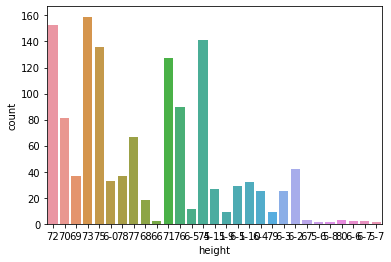

In [ ]:
cnt("height", players)

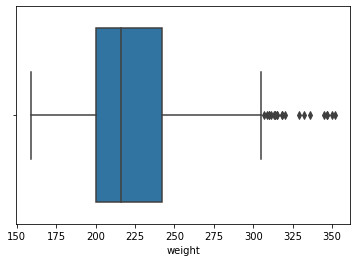

In [ ]:
bxp("weight", players)

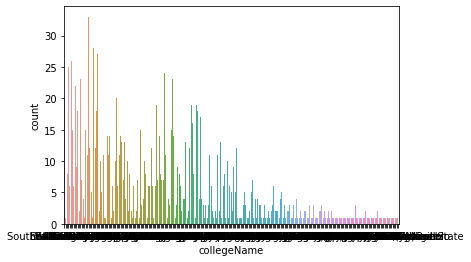

In [ ]:
cnt("collegeName", players)


In [ ]:
players.collegeName.value_counts()

Alabama                   33
Ohio State                28
Florida State             27
Florida                   26
Louisiana State           25
                          ..
Miami, O.                  1
Colorado State-Pueblo      1
Virginia Commonwealth      1
North Carolina Central     1
Howard                     1
Name: collegeName, Length: 251, dtype: int64

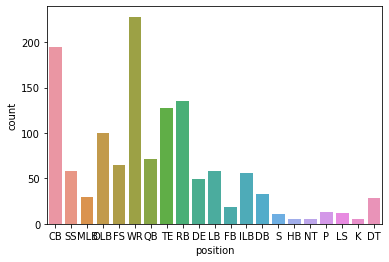

In [ ]:
cnt("position", players)

**Plays**

In [ ]:
plays.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,None,None,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,None,None,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,None,None,I,0,0,-0.702779,False


In [ ]:
plays.tail(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"1 DL, 5 LB, 5 DB",None,NaN,NaN,None,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,NaN,"2 DL, 3 LB, 6 DB",None,NaN,NaN,None,NaN,DPI,BAL 23,I,0,15,1.336078,True
19238,2018122201,2649,(7:16) (Shotgun) L.Jackson pass incomplete sho...,3,1,10,BAL,play_type_unknown,LAC,49,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,NaN,"4 DL, 1 LB, 6 DB",None,NaN,NaN,None,NaN,DPI,LAC 43,I,0,9,0.550256,True


In [ ]:
plays.shape

(19239, 27)

In [ ]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [ ]:
plays.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa
count,1.923900e+04,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19177.000000,18606.000000,18600.000000,18600.000000,18600.000000,19239.000000,19239.000000,19239.000000
mean,2.018107e+09,2176.217319,2.591039,1.920318,8.923905,29.860232,6.036189,4.216543,10.758333,12.465484,59.905753,6.279380,6.469047,0.020725
std,1.148060e+04,1240.919041,1.123155,0.848819,3.974216,12.444118,1.015547,0.897862,9.798115,10.552753,23.641588,10.184296,10.566605,1.580748
min,2.018091e+09,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,-19.000000,-78.000000,-11.935951
25%,2.018100e+09,1125.000000,2.000000,1.000000,6.000000,21.500000,6.000000,4.000000,3.000000,3.000000,40.000000,0.000000,0.000000,-0.745327
50%,2.018110e+09,2166.000000,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,9.000000,10.000000,60.000000,4.000000,4.000000,-0.190540
75%,2.018120e+09,3203.500000,4.000000,3.000000,10.000000,40.000000,7.000000,5.000000,17.000000,20.000000,80.000000,10.000000,11.000000,0.976822
max,2.018123e+09,5661.000000,5.000000,4.000000,41.000000,50.000000,11.000000,10.000000,51.000000,54.000000,109.000000,97.000000,97.000000,8.629316


In [ ]:
plays.isnull().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
gameClock                   639
absoluteYardlineNumber      639
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

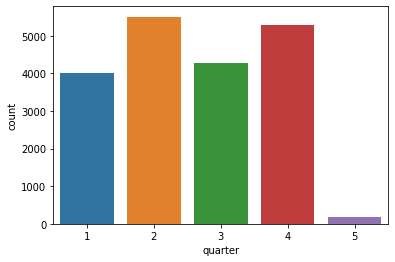

In [ ]:
cnt("quarter", plays)

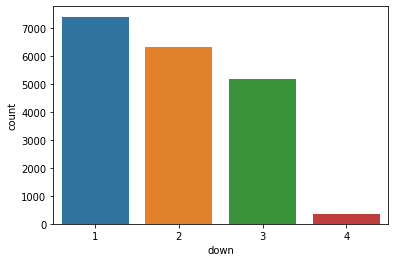

In [ ]:
cnt("down", plays)

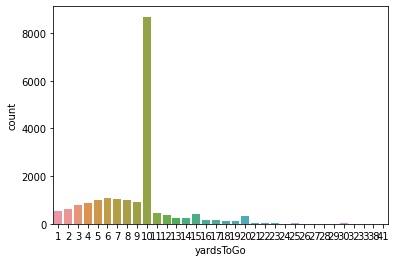

In [ ]:
cnt("yardsToGo", plays)

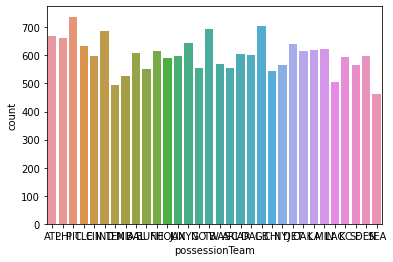

In [ ]:
cnt("possessionTeam", plays)

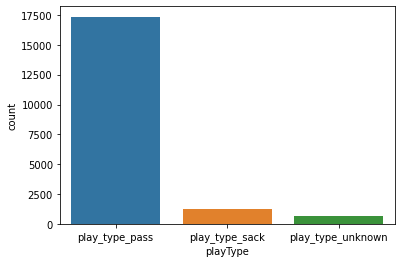

In [ ]:
cnt("playType", plays)

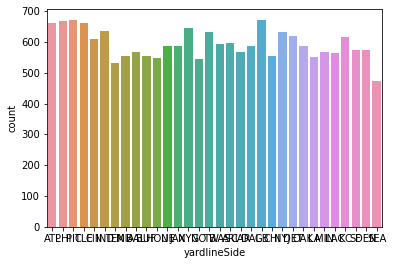

In [ ]:
cnt("yardlineSide", plays)

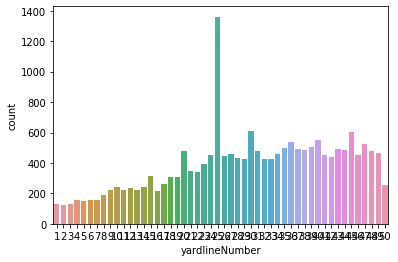

In [ ]:
cnt("yardlineNumber", plays)

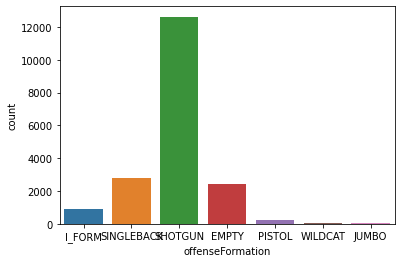

In [ ]:
cnt("offenseFormation", plays)

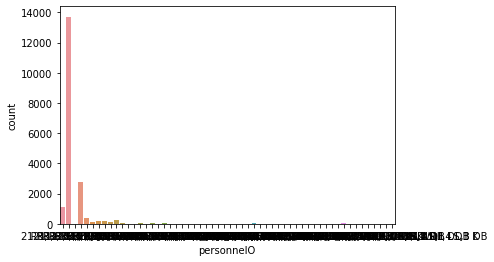

In [ ]:
cnt("personnelO", plays)

In [ ]:
# Boxplot function
def bxp(xname, df):
    sns.boxplot(x=xname, data = df)

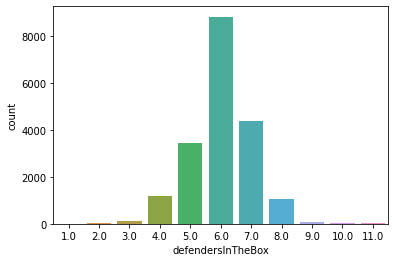

In [ ]:
cnt("defendersInTheBox", plays)

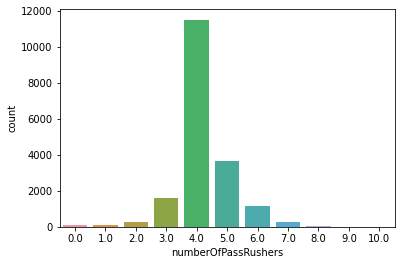

In [ ]:
cnt("numberOfPassRushers", plays)

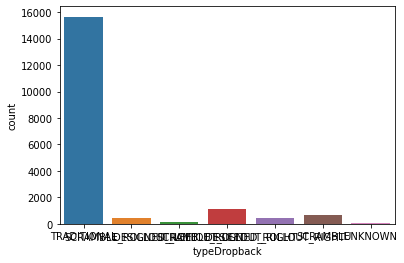

In [ ]:
cnt("typeDropback", plays)

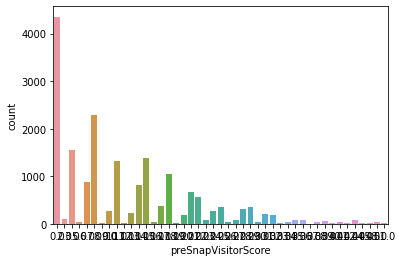

In [ ]:
cnt("preSnapVisitorScore", plays)

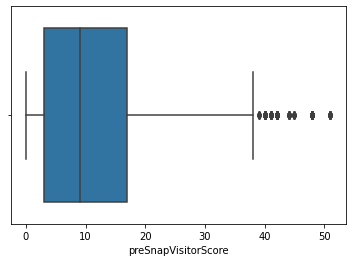

In [ ]:
bxp("preSnapVisitorScore", plays)

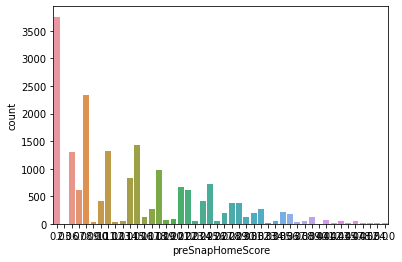

In [ ]:
cnt("preSnapHomeScore", plays)

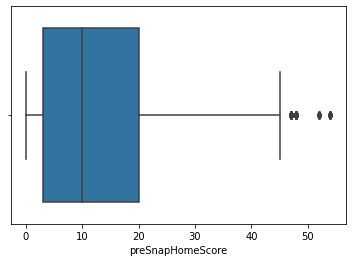

In [ ]:
bxp("preSnapHomeScore", plays)

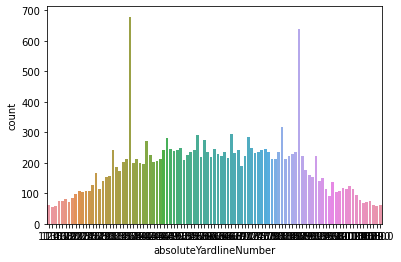

In [ ]:
cnt("absoluteYardlineNumber", plays)

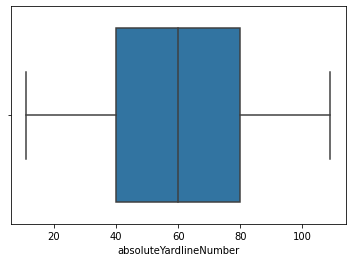

In [ ]:
bxp("absoluteYardlineNumber", plays)

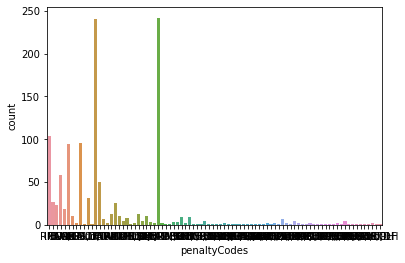

In [ ]:
cnt("penaltyCodes", plays)

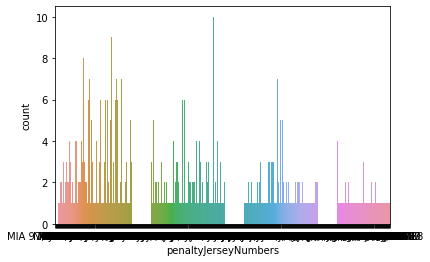

In [ ]:
cnt("penaltyJerseyNumbers", plays)

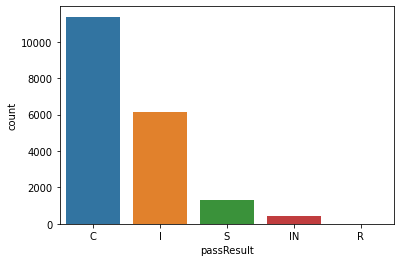

In [ ]:
cnt("passResult", plays)

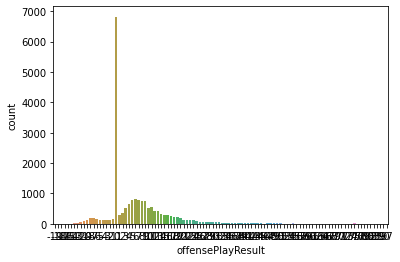

In [ ]:
cnt("offensePlayResult", plays)

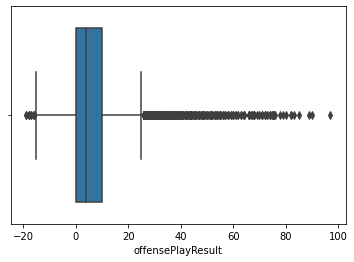

In [ ]:
bxp("offensePlayResult", plays)

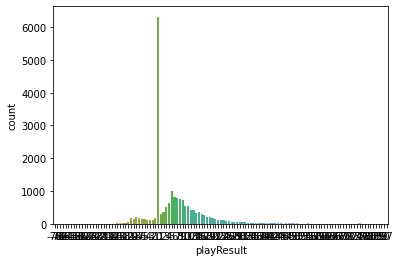

In [ ]:
cnt("playResult", plays)

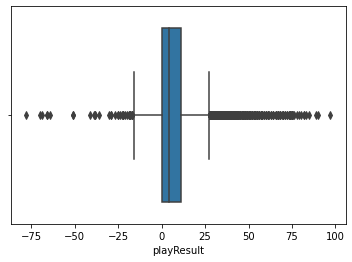

In [ ]:
bxp("playResult", plays)

**Weekly Data**

In [ ]:
weekly_data.head(3)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,Week
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,None,1
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,None,1
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,1


In [ ]:
weekly_data.tail(3)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,Week
1049262,2018-12-31T04:23:24.200Z,102.68,0.94,2.34,1.67,0.24,164.79,152.29,None,2560789.0,Darius Leonard,53.0,LB,102,away,2018123011,4261,left,None,17
1049263,2018-12-31T04:23:24.200Z,105.82,0.71,2.28,3.53,0.25,284.72,93.44,None,2561521.0,Cameron Batson,17.0,WR,102,home,2018123011,4261,left,OUT,17
1049264,2018-12-31T04:23:24.200Z,101.33,0.91,0.99,0.67,0.10,NaN,NaN,None,NaN,Football,NaN,None,102,football,2018123011,4261,left,None,17


In [ ]:
weekly_data.shape


(18309388, 20)

In [ ]:
weekly_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18309388 entries, 0 to 1049264
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   x              float64
 2   y              float64
 3   s              float64
 4   a              float64
 5   dis            float64
 6   o              float64
 7   dir            float64
 8   event          object 
 9   nflId          float64
 10  displayName    object 
 11  jerseyNumber   float64
 12  position       object 
 13  frameId        int64  
 14  team           object 
 15  gameId         int64  
 16  playId         int64  
 17  playDirection  object 
 18  route          object 
 19  Week           int64  
dtypes: float64(9), int64(4), object(7)
memory usage: 2.9+ GB


In [ ]:
weekly_data.describe()


,x,y,s,a,dis,o,dir,nflId,jerseyNumber,frameId,gameId,playId,Week
count,1.830939e+07,1.830939e+07,1.830939e+07,1.830936e+07,1.830939e+07,1.706153e+07,1.706154e+07,1.706175e+07,1.706175e+07,1.830939e+07,1.830939e+07,1.830939e+07,1.830939e+07
mean,5.983316e+01,2.673458e+01,3.193072e+00,1.989004e+00,3.231398e-01,1.807472e+02,1.804816e+02,2.385370e+06,3.746064e+01,3.522510e+01,2.018107e+09,2.182959e+03,8.938368e+00
std,2.455653e+01,1.107525e+01,2.856562e+00,1.601185e+00,3.069610e-01,1.003506e+02,1.027847e+02,5.889573e+05,2.450876e+01,2.315383e+01,1.147367e+04,1.239005e+03,4.972874e+00
min,-9.290000e+00,-1.344000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.520000e+02,1.000000e+00,1.000000e+00,2.018091e+09,5.000000e+01,1.000000e+00
25%,4.128000e+01,1.911000e+01,8.700000e-01,7.300000e-01,9.000000e-02,9.112000e+01,9.112000e+01,2.533062e+06,2.000000e+01,1.700000e+01,2.018100e+09,1.135000e+03,4.000000e+00
50%,5.978000e+01,2.672000e+01,2.810000e+00,1.750000e+00,2.800000e-01,1.793600e+02,1.802100e+02,2.552430e+06,2.900000e+01,3.300000e+01,2.018110e+09,2.177000e+03,9.000000e+00
75%,7.829000e+01,3.438000e+01,4.940000e+00,2.940000e+00,4.900000e-01,2.704000e+02,2.704800e+02,2.557972e+06,5.300000e+01,5.000000e+01,2.018120e+09,3.212000e+03,1.300000e+01
max,1.300100e+02,6.874000e+01,4.274000e+01,7.015000e+01,1.269000e+01,3.600000e+02,3.600000e+02,2.561671e+06,9.900000e+01,2.690000e+02,2.018123e+09,5.661000e+03,1.700000e+01


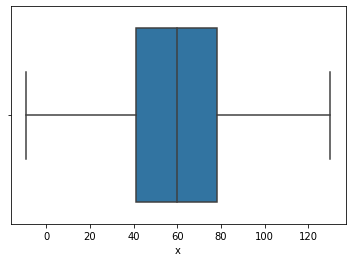

In [ ]:
bxp('x', weekly_data)


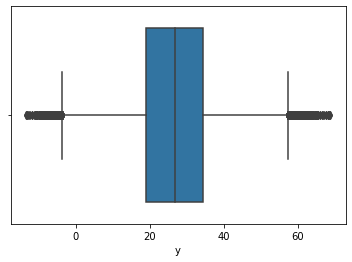

In [ ]:
bxp('y', weekly_data)


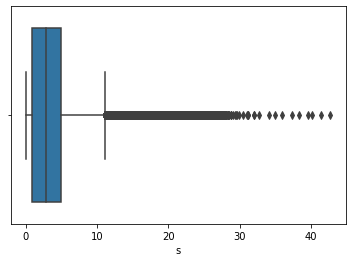

In [ ]:
bxp('s', weekly_data)


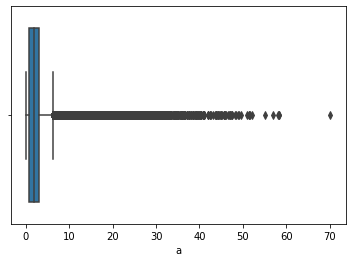

In [ ]:
bxp('a', weekly_data)


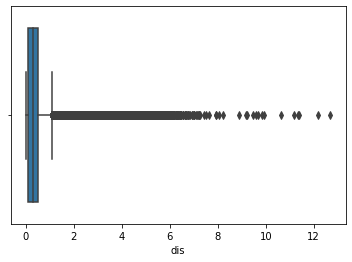

In [ ]:
bxp('dis', weekly_data)


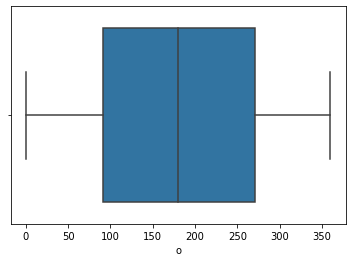

In [ ]:
bxp('o', weekly_data)


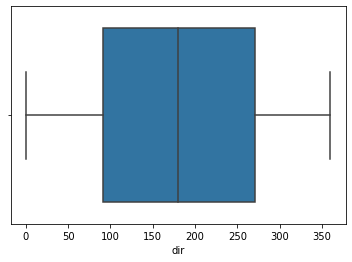

In [ ]:
bxp('dir', weekly_data)


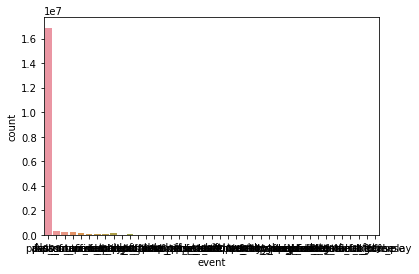

In [ ]:
cnt('event', weekly_data)


In [ ]:
weekly_data.event.value_counts()

None                         16885077
ball_snap                      282543
pass_forward                   260480
pass_arrived                   213984
pass_outcome_caught            160114
tackle                         125737
first_contact                  108879
pass_outcome_incomplete         88999
play_action                     48497
out_of_bounds                   36458
line_set                        24112
qb_sack                         16478
man_in_motion                    8907
shift                            7621
touchdown                        6864
pass_outcome_touchdown           6197
pass_outcome_interception        6154
pass_tipped                      5276
fumble                           3263
qb_strip_sack                    2459
fumble_defense_recovered         2336
handoff                          1889
fumble_offense_recovered         1771
pass_shovel                      1507
qb_spike                         1108
lateral                           554
run         

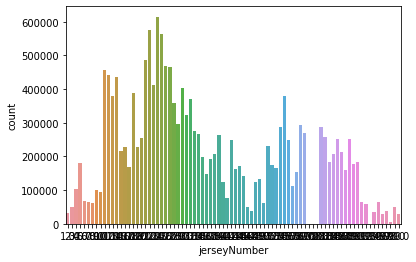

In [ ]:
cnt('jerseyNumber', weekly_data)


In [ ]:
weekly_data.jerseyNumber.value_counts()

23.0    615183
21.0    577118
24.0    563134
20.0    486348
25.0    467408
         ...  
97.0      4018
92.0       810
69.0       207
70.0       127
72.0        88
Name: jerseyNumber, Length: 82, dtype: int64

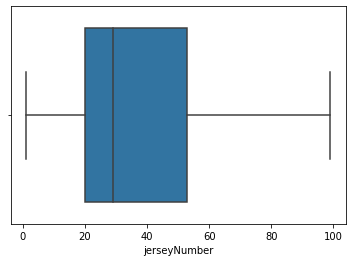

In [ ]:
bxp('jerseyNumber', weekly_data)


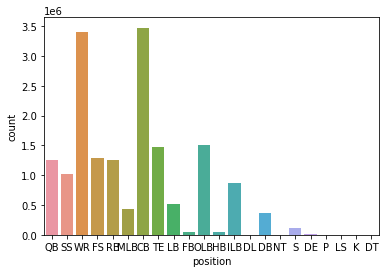

In [ ]:
cnt('position', weekly_data)


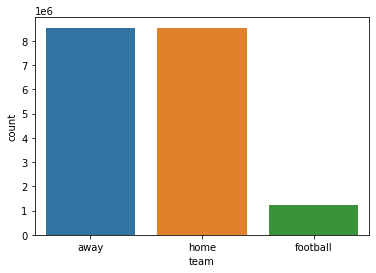

In [ ]:
cnt('team', weekly_data)


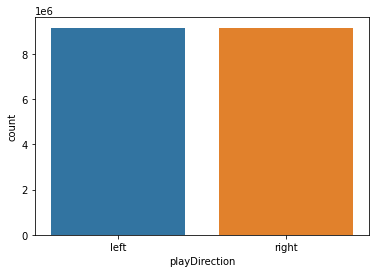

In [ ]:
cnt('playDirection', weekly_data)


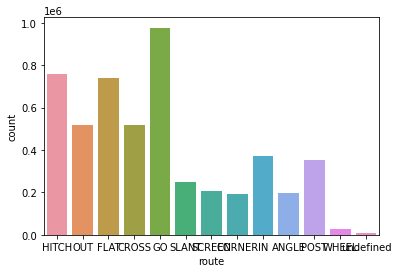

In [ ]:
cnt('route', weekly_data)


In [ ]:
weekly_data.route.value_counts()

GO           976400
HITCH        759817
FLAT         739672
OUT          517982
CROSS        515964
IN           372743
POST         353219
SLANT        248950
SCREEN       206411
ANGLE        196522
CORNER       194105
WHEEL         29102
undefined      7068
Name: route, dtype: int64